# **PROBLEM**


$$ -\Delta u + \mathbf{b}\cdot\nabla u = f \qquad \text{in }\Omega, \\ u = 0 \qquad \text{on }\partial\Omega, $$

where $\mathbf{b}=[0,1]^T$ and $f=\sin(\pi x)\,(3-2y+pi^2(y-y^2))$.

The exact solution of this PDE is $u_{\text{ex}}=\sin(\pi x)\,(y-y^2)$.


In [60]:
from IPython.core.display import clear_output
#Import packages
try:
    import dolfin as df
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin as df

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

clear_output()

In [3]:
def solver(b, f, uD, Nx, Ny, fe_order):
  #Domain and mesh
  mesh = df.UnitSquareMesh(Nx,Ny)
  #Finite element function space
  V = df.FunctionSpace(mesh, 'P', fe_order)
  #Boundary condition
  def boundary (x,on_boundary):
    return on_boundary
  bc = df.DirichletBC(V, uD, boundary)
  #Weak formulation
  uh = df.TrialFunction(V)
  vh = df.TestFunction(V)
  a = ( df.dot(df.grad(uh), df.grad(vh)) + df.dot(b, df.grad(uh)) *vh ) *df.dx
  F = f*vh *df.dx
  #Solve
  u = df.Function(V)
  df.solve(a==F, u, bc)

  return u

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


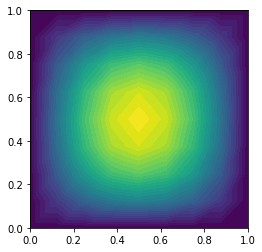

In [4]:
#Let us test the function 'solve' with the following input parameters
b = df.Constant((0,1))
pi = df.pi
f = df.Expression(' sin(pi*x[0]) * ( 3 - 2*x[1] + pi*pi*(x[1] - x[1]*x[1]) ) ', degree=3)
uD = df.Constant(0)
N = 8
R = 1
u = solver(b, f, uD, N, N, R)
df.plot(u)

In [57]:
#How does the error vary with mesh size h and polynomial degree R
N = np.array([10, 20, 40, 80])
h = np.array(1/N)
R = [1, 2, 3]
uEX = df.Expression('sin(pi*x[0]) * (x[1] - x[1]*x[1])', degree=3)
errL2 = np.zeros((len(R), len(N)))
errH1 = np.zeros((len(R), len(N)))

for i in range(len(R)):
  for j in range(len(N)):
    u = solver(b, f, uD, N[j], N[j], R[i])
    errL2[i,j] = df.errornorm(uEX, u, 'L2')
    errH1[i,j] = df.errornorm(uEX, u, 'H1')

errorL2 = pd.DataFrame(errL2, index=['R=1','R=2','R=3'], columns=['1/10','1/20','1/40','1/80'])
errorH1 = pd.DataFrame(errH1, index=['R=1','R=2','R=3'], columns=['1/10','1/20','1/40','1/80'])

Error norm L2 



,1/10,1/20,1/40,1/80
R=1,0.003546,8.954960e-04,2.244392e-04,5.614526e-05
R=2,0.000068,8.507208e-06,1.063710e-06,1.329748e-07
R=3,0.000002,1.052914e-07,6.535118e-09,4.072537e-10


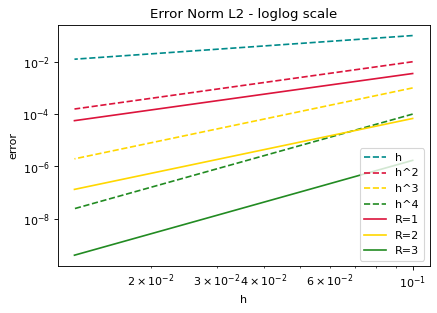

In [65]:
plt.figure(dpi=80)
plt.title('Error Norm L2 - loglog scale')
plt.xlabel('h')
plt.ylabel('error')
plt.loglog(h,h,'--', color='darkcyan')
plt.loglog(h,h*h,'--', color='crimson')
plt.loglog(h,h*h*h,'--', color='gold')
plt.loglog(h,h*h*h*h,'--', color='forestgreen')
plt.loglog(h, errL2[0,:], color='crimson' )
plt.loglog(h, errL2[1,:], color='gold')
plt.loglog(h, errL2[2,:], color='forestgreen' )
plt.legend(['h', 'h^2', 'h^3', 'h^4', 'R=1', 'R=2', 'R=3'])
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Functional analysis and numerics for PDEs/Plots/Error norm L2')
print('Error norm L2 \n')
errorL2

Error norm H1 



,1/10,1/20,1/40,1/80
R=1,0.091731,0.046045,0.023045,1.152531e-02
R=2,0.005398,0.001355,0.000339,8.480354e-05
R=3,0.000176,0.000022,0.000003,3.410905e-07


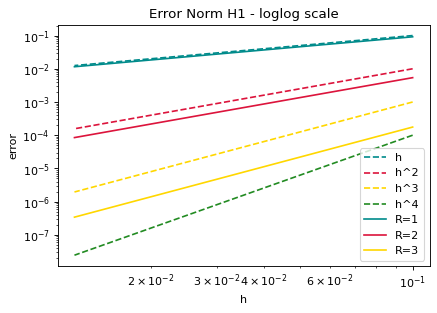

In [64]:
plt.figure(dpi=80)
plt.title('Error Norm H1 - loglog scale')
plt.xlabel('h')
plt.ylabel('error')
plt.loglog(h,h,'--', color='darkcyan')
plt.loglog(h,h*h,'--', color='crimson')
plt.loglog(h,h*h*h,'--', color='gold')
plt.loglog(h,h*h*h*h,'--', color='forestgreen')
plt.loglog(h, errH1[0,:], color='darkcyan' )
plt.loglog(h, errH1[1,:], color='crimson')
plt.loglog(h, errH1[2,:], color='gold' )
plt.legend(['h', 'h^2', 'h^3', 'h^4', 'R=1', 'R=2', 'R=3'])
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Functional analysis and numerics for PDEs/Plots/Error norm H1')
print('Error norm H1 \n')
errorH1